In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import os
import h5py
import gc

In [3]:
path = r'E:/Arrythmia/Data/PTB-XL, a large publicly available electrocardiography dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
os.listdir(path)

['example_physionet.py',
 'LICENSE.txt',
 'ptbxl_database.csv',
 'ptbxl_v102_changelog.txt',
 'ptbxl_v103_changelog.txt',
 'RECORDS',
 'records100',
 'records500',
 'scp_statements.csv',
 'SHA256SUMS.txt']

In [3]:
reference_dict = {'N':['SBRAD', 'SARRH','STACH', 'SR', '2AVB', '3AVB', '1AVB', 'ILBBB', 'IRBBB', 'CLBBB', 'CRBBB', 'NORM'],
                  'S':['PSVT', 'SVTAC', 'AFLT', 'SVARR', 'AFIB', 'WPW']}
print(reference_dict.keys())

dict_keys(['N', 'S'])


In [4]:
new_reference_dict = {'Normal sinus rhythm': 'NORM','Atrial flutter':'AFLT','Atrial fibrillation':'AFIB',}

In [5]:
ptbxl_database = pd.read_csv(path + 'ptbxl_database.csv')
scp_list = ptbxl_database['scp_codes'].to_list()
file_names = ptbxl_database['filename_hr'].to_list()
print(len(scp_list), len(file_names))
print(type(scp_list[0]), file_names[0],scp_list[0].split("'")[1])

21799 21799
<class 'str'> records500/00000/00001_hr NORM


In [43]:
n_scp_list = []
n_file_names = list.copy(file_names)
for i in range(len(scp_list)):
    n_scp_list.append(scp_list[i].split("'")[1])
print(n_scp_list[0], len(n_scp_list))


NORM 21799


In [48]:
combo = list(zip(n_scp_list, n_file_names))
for i in combo:
    if i[0] not in new_reference_dict.values():
        combo.remove(i)

print(len(combo), len(n_file_names))

14082 21799


In [56]:
print(len([x for x in combo if x[0] == 'AFLT']))
print(len([x for x in combo if x[0] == 'AFIB']))
print(len([x for x in combo if x[0] == 'NORM']))

55
45
9514


In [14]:
# print(path)
ecg = wfdb.io.rdheader(path + 'records500/00000/00017_hr')
print(ecg)
print(ecg.__dict__)
ecg2 = wfdb.io.rdrecord(path + 'records500/00000/00017_hr')
print(ecg2.__dict__['p_signal'].shape)


{'record_name': '00017_hr', 'n_sig': 12, 'fs': 500, 'counter_freq': None, 'base_counter': None, 'sig_len': 5000, 'base_time': None, 'base_date': None, 'comments': [], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat', '00017_hr.dat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16'], 'samps_per_frame': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'skew': [None, None, None, None, None, None, None, None, None, None, None, None], 'byte_offset': [None, None, None, None, None, None, None, None, None, None, None, None], 'adc_gain': [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0], 'baseline': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
sig = ecg2.__dict__['p_signal']
sig = np.array(sig)

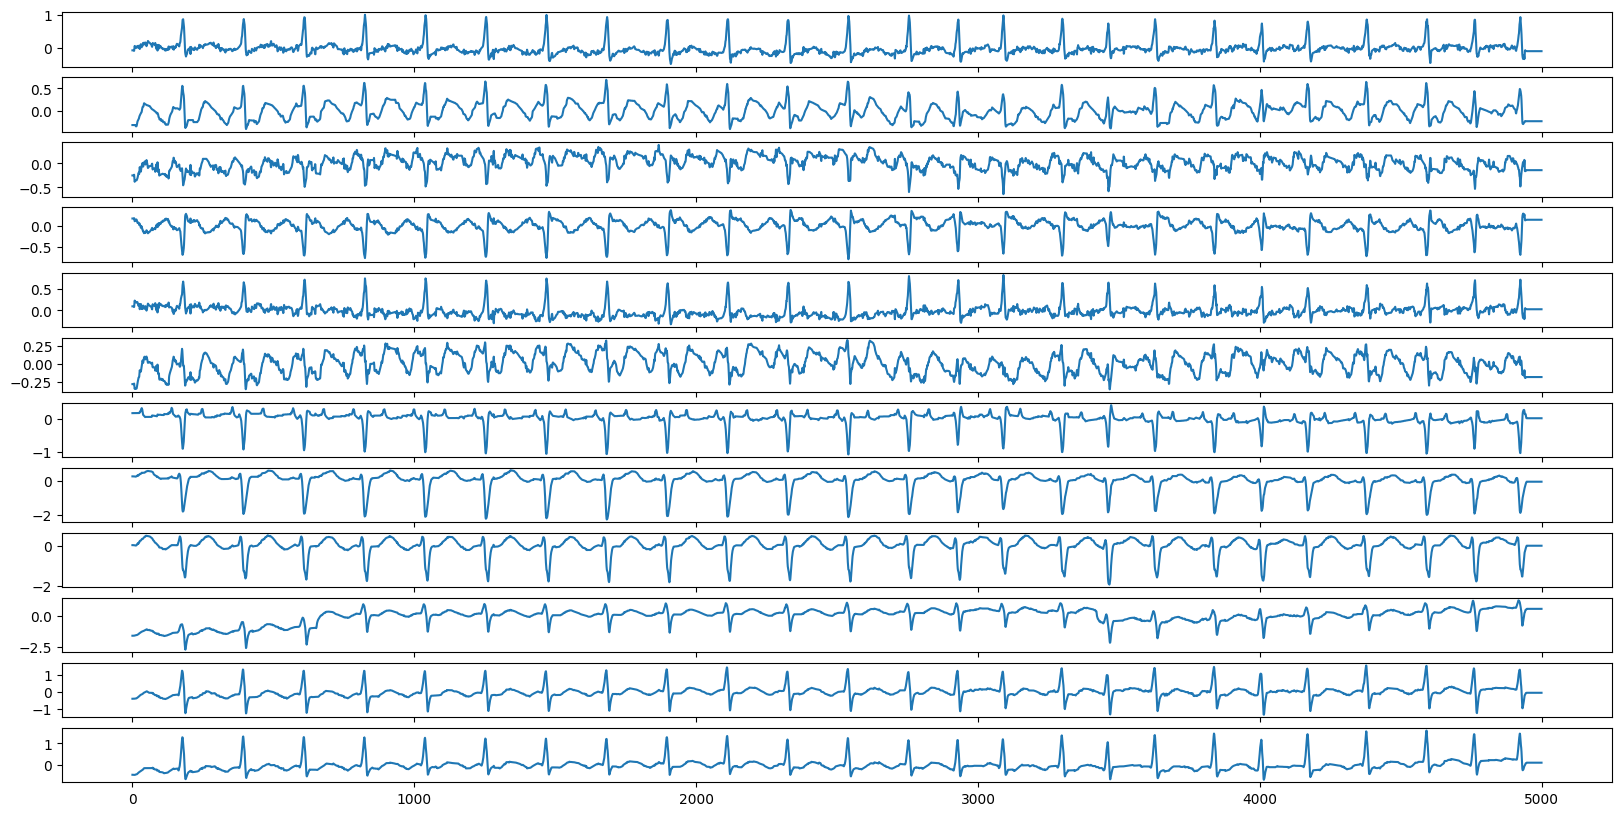

In [18]:
plt.figure(figsize=(20, 10))
for i in range(12):
    plt.subplot(12,1, i + 1)
    plt.plot(sig[:, i])
# plt.plot(sig)